# **Amazon AWS SaaS Sales Data Analytics**

---
by: Fareza Duta<br>
<br>Linkedin: [Fareza Duta](https://www.linkedin.com/in/muhammad-fareza-duta-pradana-53b23a215/) <br>
GitHub: [s1llyyyy](https://github.com/s1llyyyy)<br>
Tableau: [Fareza Duta](https://public.tableau.com/app/profile/fareza.duta/vizzes)

---

>**This notebook has been developed as part of Capstone Project 2 for the JCDS program at Purwadhika. It includes a comprehensive analysis of a SaaS sales dataset, structured into the following sections:**

- Domain Introduction: An overview of the SaaS industry, highlighting the importance of data analytics in optimizing sales strategies.
- Business Problem Statement: Identification of the key challenges faced by the business in managing and interpreting sales data.
- Data Understanding: Exploration of the dataset, including its structure, sources, and key variables.
- Data Wrangling and Cleaning: Detailed processes to prepare the data for analysis, addressing issues such as missing values, outliers, and data inconsistencies.
- Data Visualization: Graphical representation of the data to uncover trends, patterns, and insights.
- Conclusion and Recommendations: Summary of findings and actionable insights, along with strategic recommendations based on the analysis.

**The goal of this project is to demonstrate the application of data analysis techniques in solving real-world business problems, specifically within the SaaS industry.**

Dataset that used for this project can be found [here](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

# **1. Introduction** 

---


## **1.1 Business Intorduction**

---


In this project, SaaS sales data is from Amazon AWS. Amazon Web Services (AWS) is the world’s most comprehensive and broadly adopted cloud, offering over 200 fully featured services from data centers globally. Millions of customers—including the fastest-growing startups, largest enterprises, and leading government agencies—are using AWS to lower costs, become more agile, and innovate faster. [What is AWS?](https://aws.amazon.com/what-is-aws/)

`A Software as a Service` (SaaS) business model involves providing software applications over the internet as a service, rather than selling physical copies or requiring users to download and install the software on their devices. In a SaaS model, customers typically subscribe to the software on a recurring basis, such as monthly or annually, rather than making a one-time purchase. This model offers several key benefits and has become increasingly popular in recent years due to its flexibility and scalability.

- Key Characteristics of SaaS Businesses:
Subscription-Based Revenue: `SaaS businesses generate revenue through subscriptions`, which provides a predictable and recurring revenue stream. This model allows for better financial forecasting and stability.

- Cloud-Based Delivery: `SaaS applications are hosted in the cloud and accessed via the internet`. This eliminates the need for users to install and maintain the software on their own devices, making it easier to scale and update.

- Scalability: `SaaS businesses can easily scale their operations to accommodate a growing number of users`. As demand increases, additional resources can be added to the cloud infrastructure without significant changes to the application itself.

- Continuous Updates and Improvements: `SaaS providers can continuously roll out updates, improvements, and new features without requiring users to manually upgrade their software`. This ensures that customers always have access to the latest version.

- Low Entry Barrier for Customers: With SaaS, `customers typically avoid large upfront costs` associated with purchasing software licenses. Instead, `they pay a manageable subscription fee`, which lowers the barrier to entry.

- Multi-Tenancy: `SaaS platforms often operate on a multi-tenant architecture`, where a single instance of the software serves multiple customers. This approach maximizes efficiency and resource utilization.

- Customer Relationship Focus: `SaaS businesses place a strong emphasis on customer relationships`, as the recurring revenue model relies on customer retention. Providing excellent customer support, onboarding, and regular communication is critical to maintaining and growing the customer base.

## **1.2 Problem Statements**

---

In the competitive landscape of Software as a Service (SaaS), understanding customer behavior, subscription patterns, and revenue trends is crucial for sustaining growth and improving customer retention. Despite the advantages of a subscription-based model, many SaaS companies face challenges in accurately forecasting revenue, identifying churn risks, and optimizing pricing strategies.

The goal of this data analysis project is to leverage existing customer and transaction data to:

- Analyze sales and profit performance to identify the company's performance by determining the most profitable and least profitable products.
- Analyze customer segments based on their purchase patterns and map the distribution of customers.
- Identify key factors that can boost sales and profit.

>By addressing these areas, the project aims to enhance our understanding of customer behavior, improve retention strategies, optimize product offerings, and drive sustainable growth in our SaaS business.

# **2. Data Preparation**

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import tabulate as tb
from scipy import stats


pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

## **2.1. Data Understanding**

---

In [2]:
# Import SaaS-Sales data as df
df = pd.read_csv('SaaS-Sales.csv')
df.head()

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


| **Column Name**   | **Description**                                                        |
|-------------------|------------------------------------------------------------------------|
| **Row ID**        | A unique identifier for each transaction.                              |
| **Order ID**      | A unique identifier for each order.                                    |
| **Order Date**    | The date when the order was placed.                                    |
| **Date Key**      | A numerical representation of the order date (YYYYMMDD).               |
| **Contact Name**  | The name of the person who placed the order.                           |
| **Country**       | The country where the order was placed.                                |
| **City**          | The city where the order was placed.                                   |
| **Region**        | The region where the order was placed.                                 |
| **Subregion**     | The subregion where the order was placed.                              |
| **Customer**      | The name of the company that placed the order.                         |
| **Customer ID**   | A unique identifier for each customer.                                 |
| **Industry**      | The industry the customer belongs to.                                  |
| **Segment**       | The customer segment (SMB, Strategic, Enterprise, etc.).               |
| **Product**       | The product that was ordered.                                          |
| **License**       | The license key for the product.                                       |
| **Sales**         | The total sales amount for the transaction.                            |
| **Quantity**      | The total number of items in the transaction.                          |
| **Discount**      | The discount applied to the transaction.                               |
| **Profit**        | The profit from the transaction.                                       |


In [3]:
# Check the data basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

>**Data type that need to be changed**
- Row ID (It's not really important since it can be represented by the index number).
- Order Date (Order date data type is incorrect, we need to adjust from object to datetime).
- Date Key (Date Key is redundant, we don't really use the data because it already represented by the Order Date).
- Customer ID data type is in int, we need to change to str based (object). Because customer ID is a nominal data not ordinal.

In [4]:
# Check the data with description statistic
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


## **2.2 Data Cleaning**

---

**After checking the data information, there's some incorrect data type and unused columns.**

#### **2.2.1 Drop unused columns**

In [5]:
# Drop unused columns
df.drop(columns=['Date Key', 'Row ID'], inplace= True)

>`'Date Key' and 'Row ID'` columns is dropped because `both of them are redundant columns`. Date Key already represented by Order Date and Row ID is not necessary used, because it can be represented by table index

### **2.2.2 Change data type**

In [6]:
# Changing incorrect data type

print("DataFrame before adjustment\n")
df.info()

DataFrame before adjustment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Contact Name  9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Subregion     9994 non-null   object 
 7   Customer      9994 non-null   object 
 8   Customer ID   9994 non-null   int64  
 9   Industry      9994 non-null   object 
 10  Segment       9994 non-null   object 
 11  Product       9994 non-null   object 
 12  License       9994 non-null   object 
 13  Sales         9994 non-null   float64
 14  Quantity      9994 non-null   int64  
 15  Discount      9994 non-null   float64
 16  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(12)
memory

>As mentioned earlier, two columns in the dataset have incorrect data types: 'Order Date' and 'Customer ID.' We need to change these data types first so they can be used correctly in the analysis.

In [7]:
# Changing the Order Date column data type from object to datetime

df['Order Date'] = pd.to_datetime(df['Order Date'])

>The 'Order Date' column has been converted from object to the datetime data type using a pandas function.

In [8]:
# Changing the Customer ID column data type from integrer to object

df['Customer ID'] = df['Customer ID'].astype(str)

>The 'Customer ID' column has been converted from an integer to an object (string) data type, because Customer ID is a nomine categorical data.

In [9]:
print("DataFrame after adjustment\n")
df.info()

DataFrame after adjustment

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount  

>The data types for Customer ID and Order Date have been changed.

### **2.2.3 Handling Missing Data and Duplicates**

In [10]:
# Check the NaN values in the df

df.isna().sum()

Order ID        0
Order Date      0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

>There are no missing values (NaN) in the dataset.

In [11]:
# Check is there any duplicated data in df

df.duplicated().sum()

np.int64(0)

>There are no duplicated data in the dataset

#### **Check Empty String Value**

In [12]:
empty_string = df.apply(lambda x: (x == '').any())
print(empty_string)

Order ID        False
Order Date      False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool


#### **Check '0' String Value**

In [13]:
has_zero = df.apply(lambda x: (x == 0).any())
print(has_zero)

Order ID        False
Order Date      False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount         True
Profit           True
dtype: bool


In [14]:
(df[df['Profit'] == 0]).head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
234,EMEA-2023-100930,2023-04-08,Bernadette Nolan,Germany,Cologne,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,Enterprise,SaaS Connector Pack,D1EECPPCOU,258.072,3,0.2,0.0
551,AMER-2022-136406,2022-04-16,Zoe Ferguson,United States,Los Angeles,AMER,NAMER,Cigna,1038,Healthcare,SMB,FinanceHub,OIC3INMWQQ,1121.568,2,0.2,0.0
563,AMER-2021-130736,2021-12-07,Caroline Burgess,Canada,Toronto,AMER,NAMER,J.P. Morgan Chase & Co.,1054,Finance,SMB,Storage,BGFLDMT8ZR,3.960,2,0.0,0.0
569,AMER-2023-156951,2023-10-02,Dominic Hill,Canada,Toronto,AMER,NAMER,Siemens,1043,Manufacturing,Strategic,FinanceHub,77J1GS09N1,451.152,3,0.2,0.0
819,EMEA-2020-140858,2020-06-28,Justin Anderson,France,Paris,EMEA,EU-WEST,CVS Health,1026,Retail,SMB,FinanceHub,RGSPQGTJFX,1228.465,5,0.3,0.0


In [15]:
len(df[df['Profit'] == 0])

65

>There are 65 entries with a value of 0 in the 'Profit' column. We can accept this data, as it is still considered normal for analysis.

In [16]:
len(df[df['Discount'] == 0])

4798

>There are 4,798 entries with a value of 0 in the 'Discount' column. We can accept this data, as a 0 discount is a normal occurrence.

In [17]:
# Function to check for leading or trailing whitespace
def leading_or_trailing_whitespace(column):
    return column.str.contains(r'^\s|\s$', regex=True).any()

# Function to check for any whitespace
def any_whitespace(column):
    return column.str.contains(r'\s', regex=True).any()

# Apply functions only to string columns
string_columns = df.select_dtypes(include='object')
whitespace_columns_leading_trailing = string_columns.apply(leading_or_trailing_whitespace)
whitespace_columns_any = string_columns.apply(any_whitespace)

print("Columns with leading or trailing whitespace:")
print(whitespace_columns_leading_trailing)
print("Columns with any whitespace:")
print(whitespace_columns_any)

Columns with leading or trailing whitespace:
Order ID        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
dtype: bool
Columns with any whitespace:
Order ID        False
Contact Name     True
Country          True
City             True
Region          False
Subregion       False
Customer         True
Customer ID     False
Industry         True
Segment         False
Product          True
License         False
dtype: bool


>Since there are no columns with leading or trailing whitespace, we can conclude that the data is free from any potential whitespace errors.

### **2.2.4 Checking the Outliers**

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

We need to check for outliers in all numerical data.

In [19]:
column = 'Sales'

# IQR Formula for Outliers
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the function to each group (Product) and get the count of outliers
total_outliers = outliers.groupby('Product')[['Product']].count().rename(columns={'Product': f'{column} Outliers'}).sort_values(ascending=False, by = f'{column} Outliers')
total_outliers

,Sales Outliers
Product,
FinanceHub,229
ContactMatcher,226
Site Analytics,210
Marketing Suite - Gold,142
Data Smasher,69
Big Ol Database,65
Marketing Suite,63
OneView,56
Alchemy,56


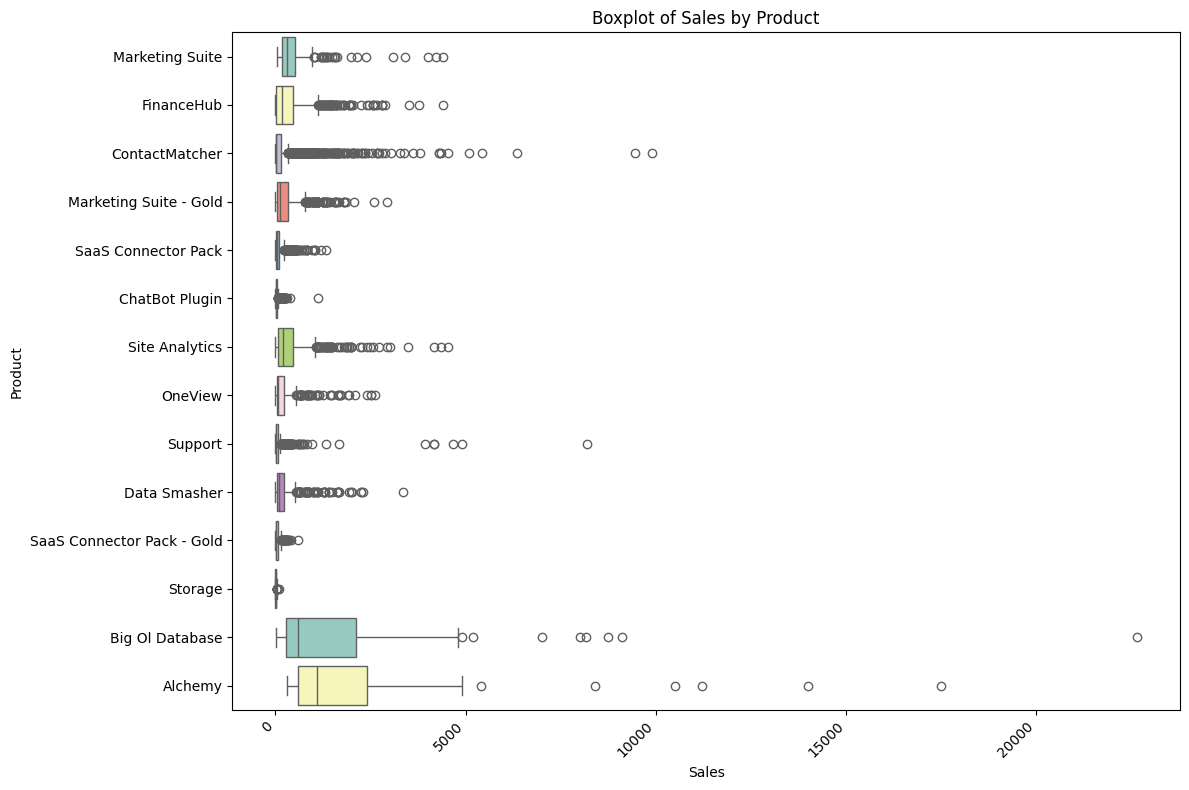

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sales', y='Product', data=df, palette="Set3")

# Customize the plot
plt.title('Boxplot of Sales by Product')
plt.xlabel('Sales')
plt.ylabel('Product')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
column = 'Quantity'

# IQR Formula for Outliers
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the function to each group (Product) and get the count of outliers
total_outliers = outliers.groupby('Product')[['Product']].count().rename(columns={'Product': f'{column} Outliers'}).sort_values(ascending=False, by = f'{column} Outliers')
total_outliers

,Quantity Outliers
Product,
ContactMatcher,40
Support,22
FinanceHub,19
Data Smasher,18
SaaS Connector Pack,15
Marketing Suite - Gold,14
Site Analytics,14
ChatBot Plugin,8
Storage,6


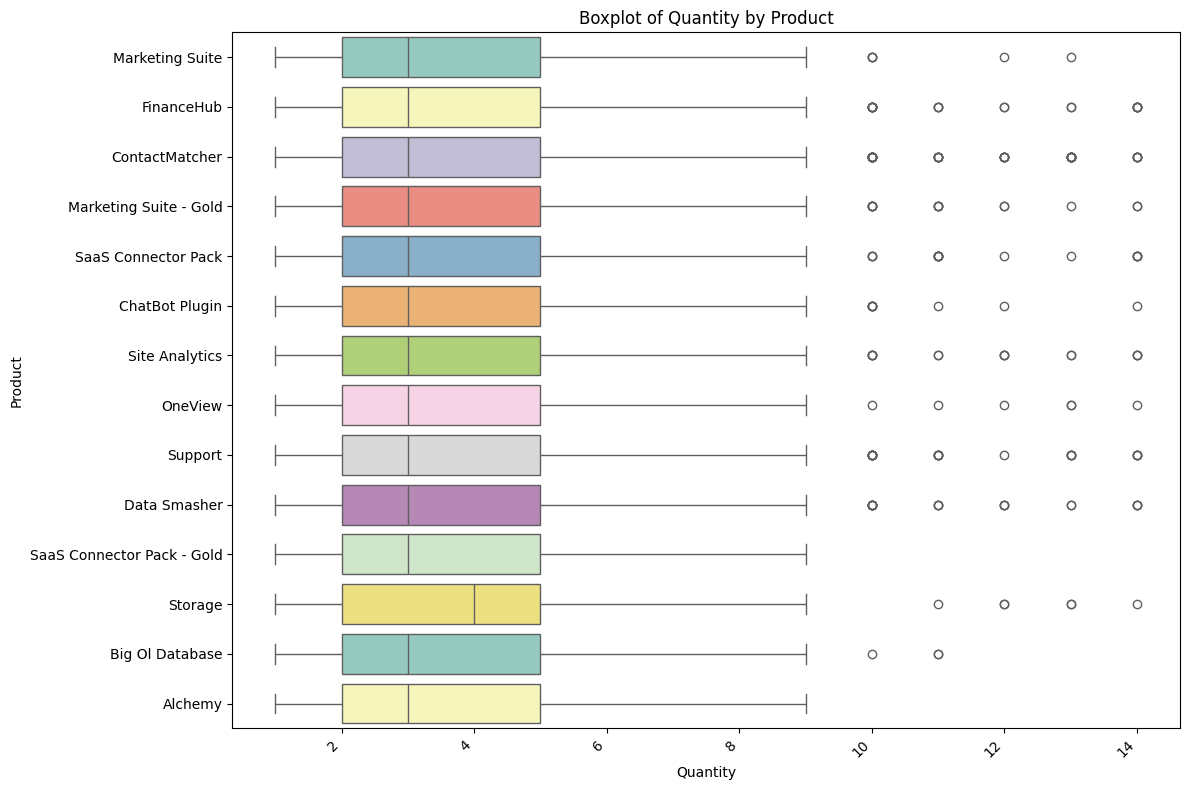

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Quantity', y='Product', data=df, palette="Set3")

# Customize the plot
plt.title('Boxplot of Quantity by Product')
plt.xlabel('Quantity')
plt.ylabel('Product')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [23]:
column = 'Profit'

# IQR Formula for Outliers
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Apply the function to each group (Product) and get the count of outliers
total_outliers = outliers.groupby('Product')[['Product']].count().rename(columns={'Product': f'{column} Outliers'}).sort_values(ascending=False, by = f'{column} Outliers')
total_outliers

,Profit Outliers
Product,
ContactMatcher,417
Site Analytics,264
FinanceHub,236
Data Smasher,160
Marketing Suite - Gold,156
OneView,137
Support,135
SaaS Connector Pack,100
Marketing Suite,94


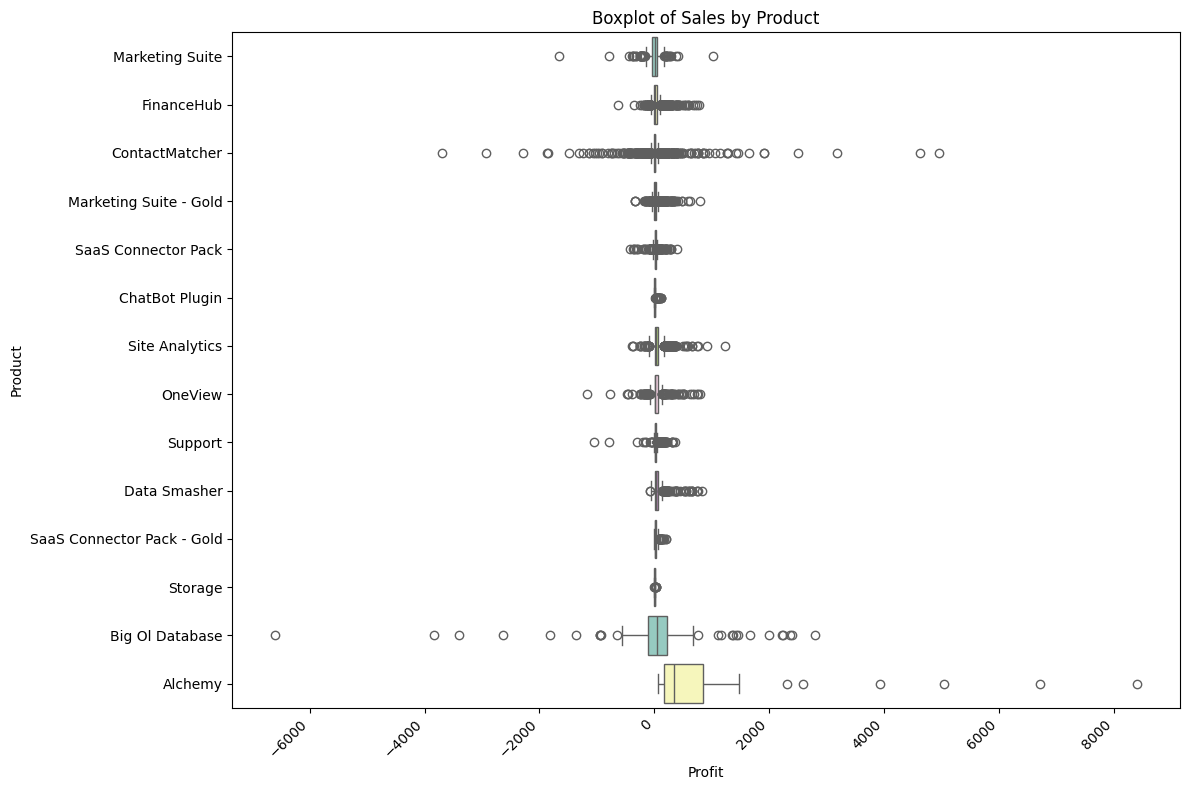

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Profit', y='Product', data=df, palette="Set3")

# Customize the plot
plt.title('Boxplot of Sales by Product')
plt.xlabel('Profit')
plt.ylabel('Product')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

- The outliers checking is done by checking outliers for each product. We should check outliers in each product because not all of them have same characteristic. For example, Big ol Database and Alchemy have high value of sales than to other product.

- Each numerical column has a different number of outliers. There is a high number of outliers in the Product and Sales columns. However, we still need the information in the Sales and Profit columns because these outliers can provide insights into unique events or patterns that could be valuable for decision-making.


- Extreme outliers in sales and profit could provide valuable insights, as they occur less frequently than others.

# **3. Data Analysis**

---
- Data visualization
- Insight

## **3.1 Exploratory Data Analysis (EDA)**

---

In this section, we will conduct a thorough exploration of the dataset to better understand its structure, contents, and underlying patterns. This analysis will provide valuable insights that will inform and guide the subsequent, more detailed analyses. By examining various aspects such as data distribution, correlations, and potential anomalies, we can ensure that our later analyses are more accurate and effective.

In [25]:
df.head(
)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **3.1.1 Data Distribution**

In [26]:

def normality_test(df):
    # Select numerical columns
    num_cols = df.select_dtypes(include=[np.number]).columns
    
    # Initialize lists to store results
    columns = []
    p_values = []
    is_normal = []
    
    # Perform Kolmogorov Smirnov test for each numerical column
    for col in num_cols:
        _, p_value = stats.kstest(df[col], 'norm')
        columns.append(col)
        p_values.append(p_value)
        is_normal.append("Normal" if p_value >= 0.05 else "Not Normal")
    
    # Create results dataframe
    results_df = pd.DataFrame({
        'Column': columns,
        'P-value': p_values,
        'Distribution': is_normal
    })
    
    return results_df

# Apply the function to your dataframe
results = normality_test(df)

# Display the results
results

,Column,P-value,Distribution
0,Sales,0.0,Not Normal
1,Quantity,0.0,Not Normal
2,Discount,0.0,Not Normal
3,Profit,0.0,Not Normal


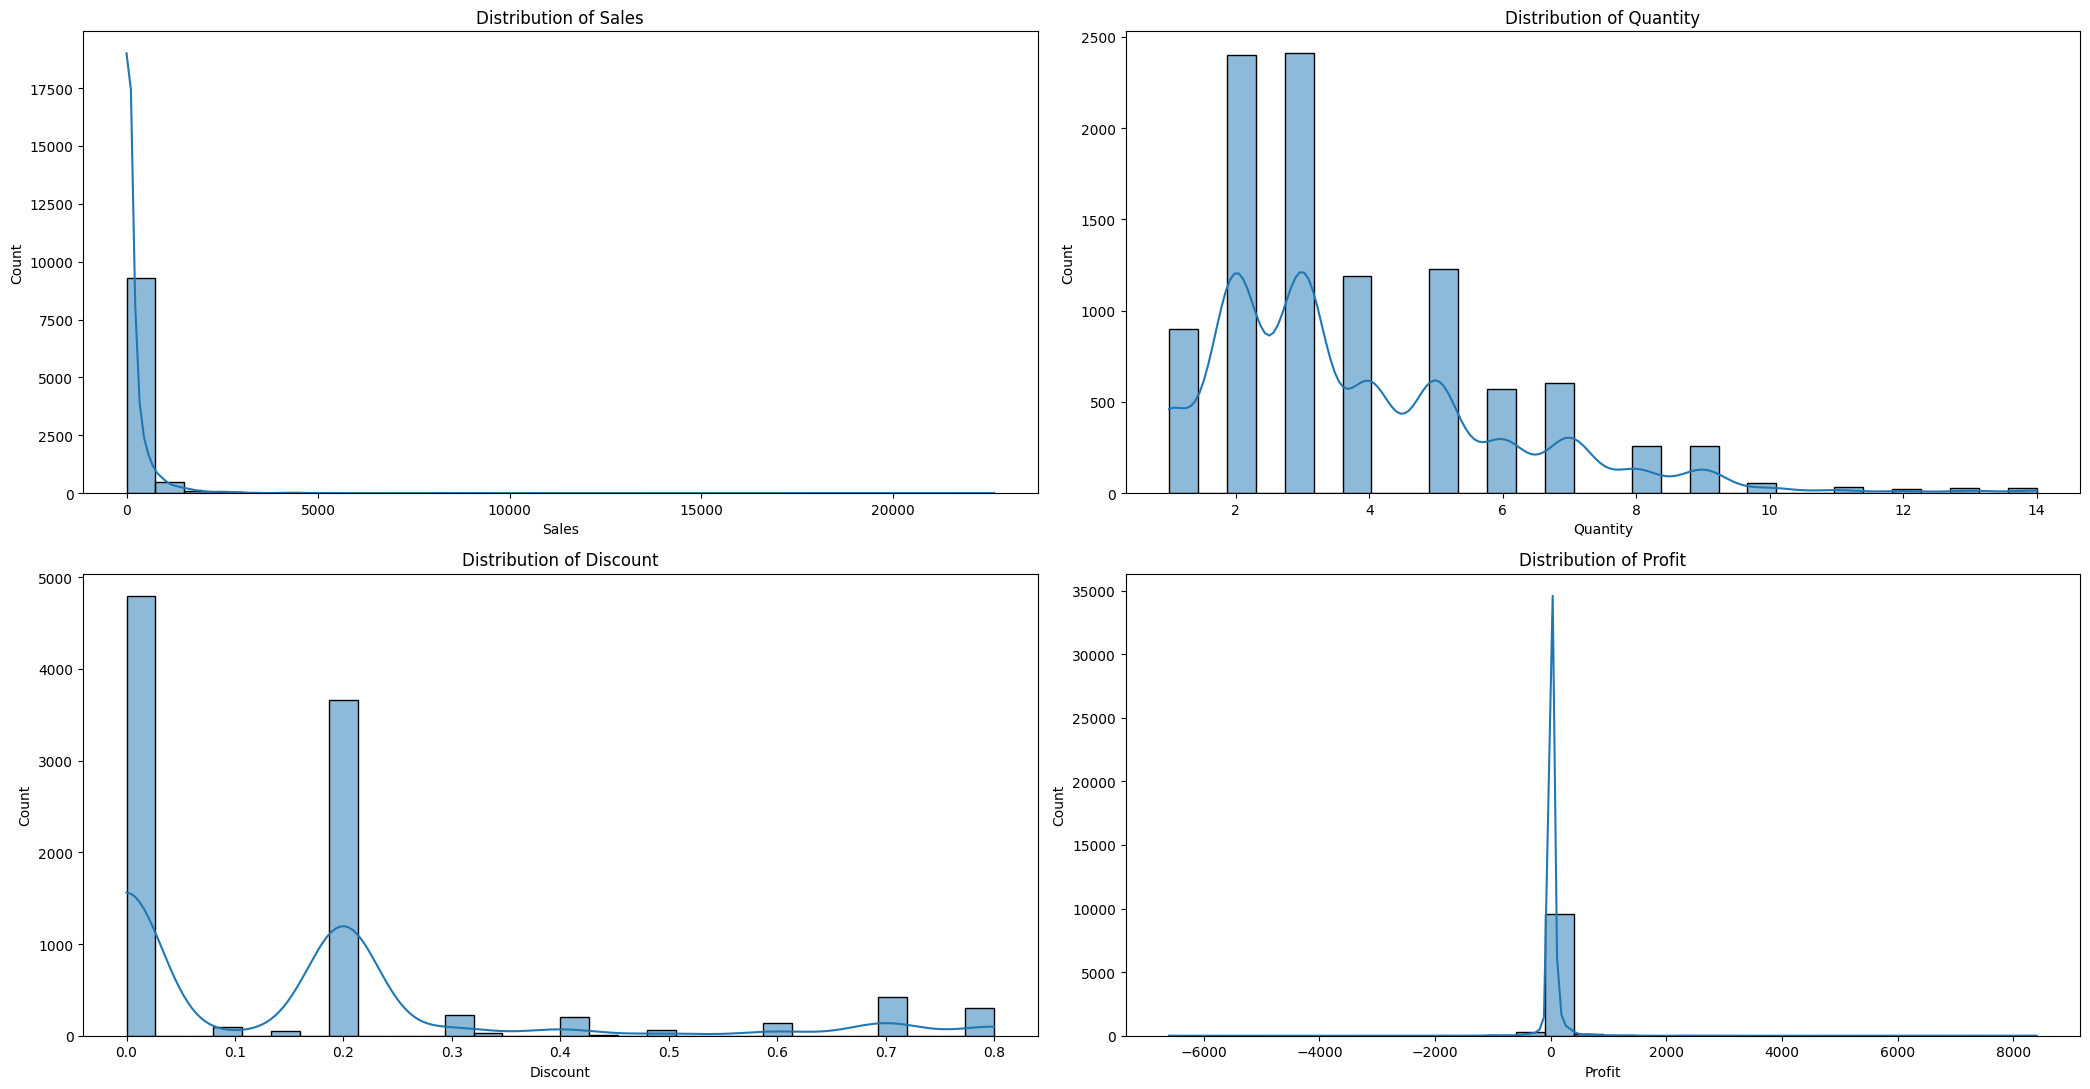

In [27]:
# Show distribution of numerical columns

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(21, 11))

# Plot a histogram for each numerical column
plt.subplot(2, 2, 1)
sns.histplot(data=df['Sales'], kde=True, bins=30)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.histplot(data=df['Quantity'], kde=True, bins=30)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(data=df['Discount'], kde=True, bins=30)
plt.title('Distribution of Discount')
plt.xlabel('Discount')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.histplot(data=df['Profit'], kde=True, bins=30)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

None of the numerical columns in the dataset are normally distributed. Therefore, we should consider using more suitable analysis methods, such as non-parametric tests and other approaches that are less sensitive to outlier

In [28]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **3.1.2 Correlation**

Text(0.5, 1.0, 'Correlation of Numerical Column')

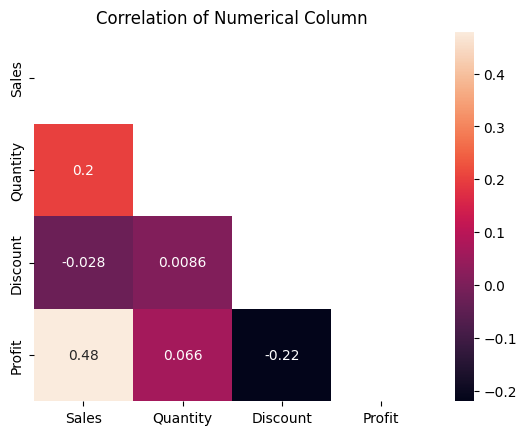

In [29]:
triu = np.triu(df.corr(numeric_only=True, method='spearman'))

# Make heatmap for the correlation between numerical number
sns.heatmap(df.corr(numeric_only=True),
            mask=triu,
            annot=True
            )
plt.title('Correlation of Numerical Column')

From the correlation heatmap, the highest correlation observed is between Profit and Sales, with a score of 0.48. A correlation of 0.48 is considered moderate. This positive correlation indicates that as Sales increase, Profit tends to increase as well.

### **3.1.3 Categorical Data Distribution**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   object        
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

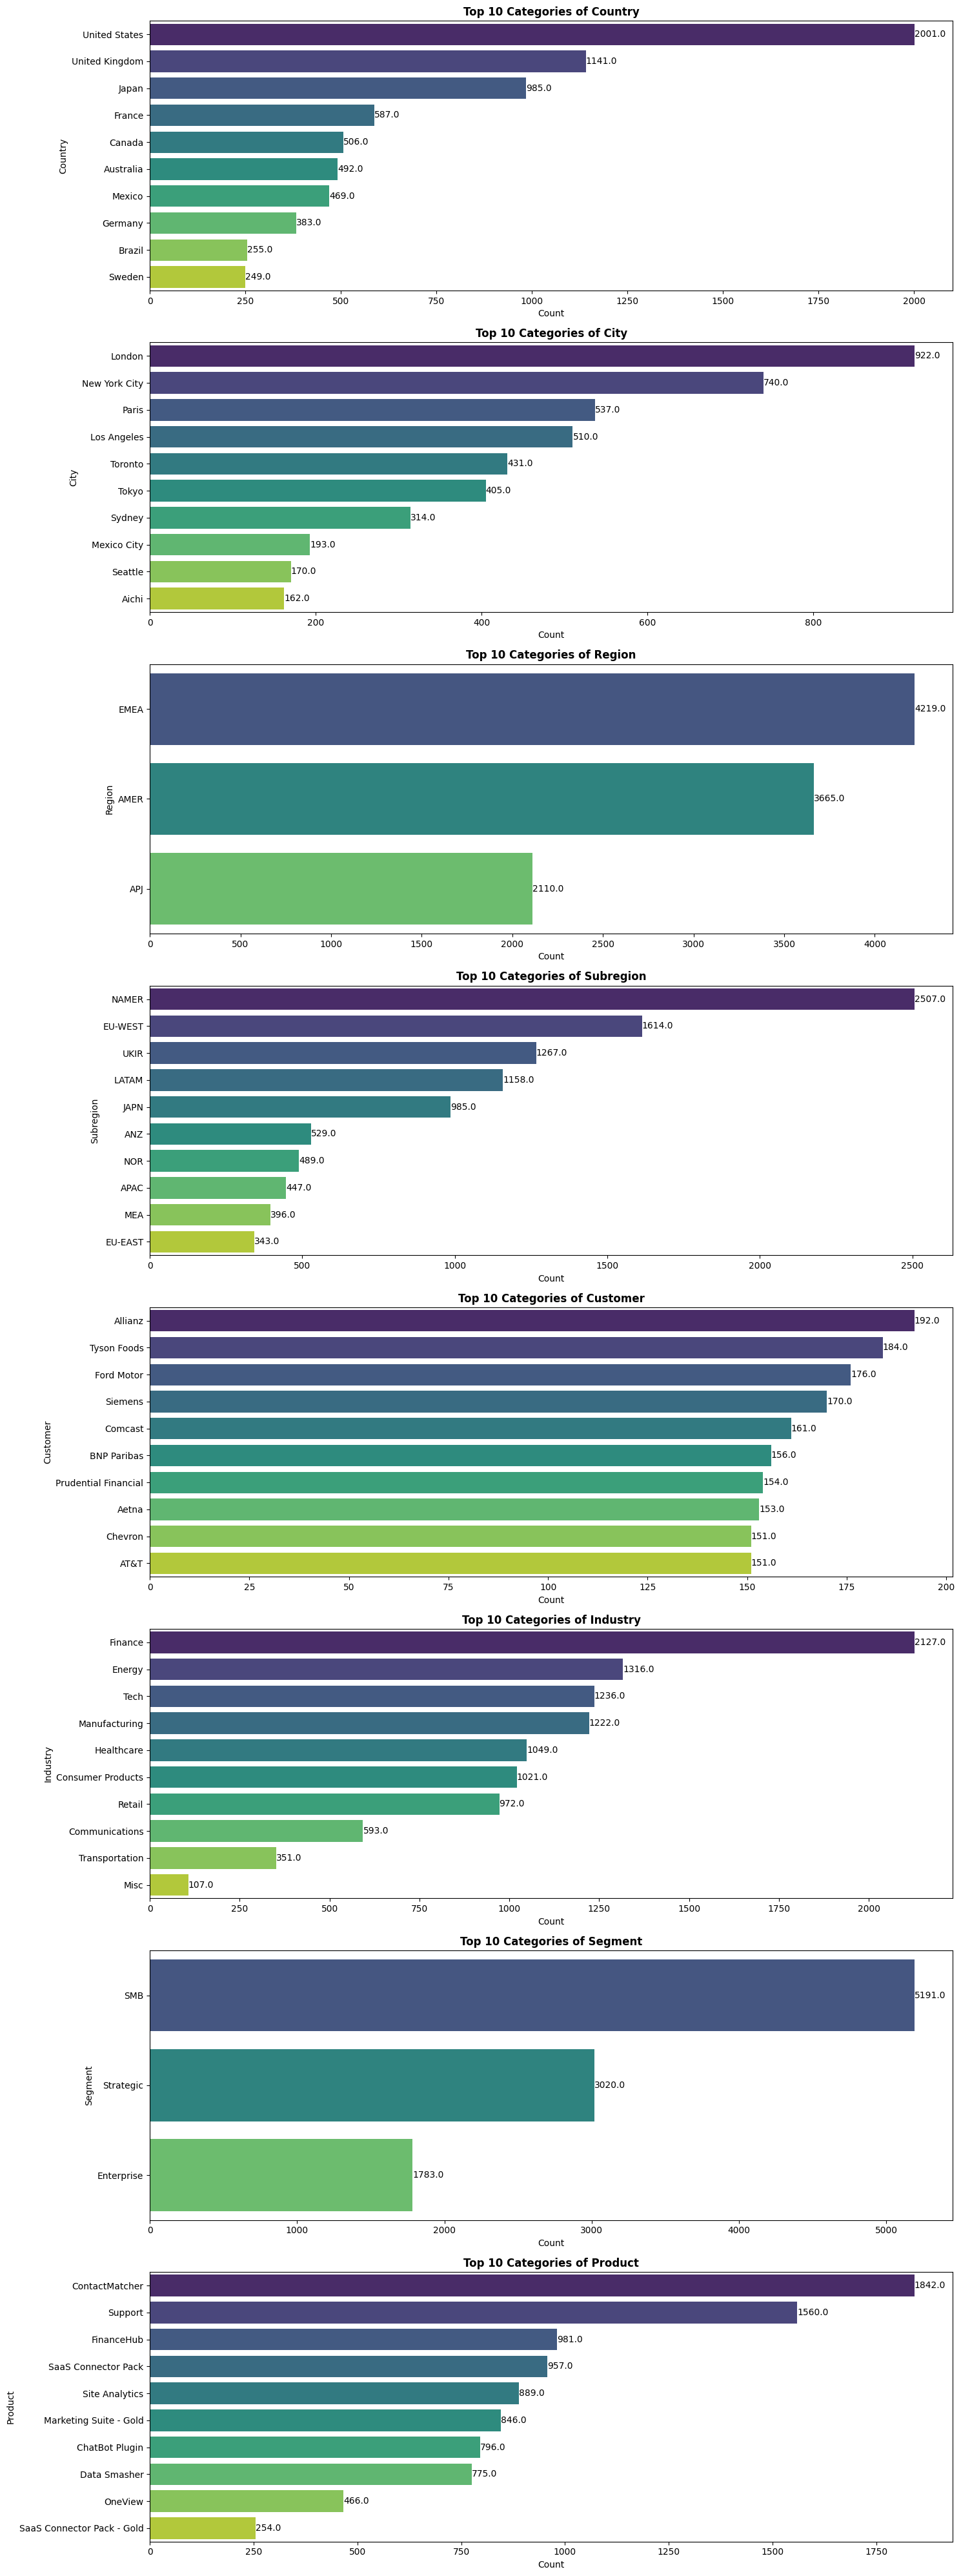

In [31]:
# Show distribution of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Drop specific columns from the list of categorical columns
categorical_cols = categorical_cols.drop(['Order ID', 'Customer ID', 'Contact Name', 'License'])

# Set up the plotting style and size
plt.figure(figsize=(15, len(categorical_cols) * 5))

# Loop through each categorical column and create a bar plot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    
    # Count occurrences and get top 10 categories
    top_categories = df[col].value_counts().nlargest(10)
    
    # Create bar plot for top 10 categories
    ax = sns.barplot(y=top_categories.index, x=top_categories.values, palette='viridis')
    plt.title(f'Top 10 Categories of {col}', fontdict={'fontweight':'bold'})
    plt.xlabel('Count')
    plt.ylabel(col)
    
    # Annotate the bars with counts
    for p in ax.patches:
        width = p.get_width()
        ax.text(width, p.get_y() + p.get_height() / 2, f'{width}', 
                ha='left', va='center', color='black')

plt.tight_layout()
plt.show()


From the graph above, we can observe the top 10 values in each categorical column. We can use this information for further analysis later.

## **3.2 Data Analysis**

---

### **3.2.1 - Analyze sales and profit performance to identify the company's performance by determining the most profitable and least profitable products.**

In this analysis section, we will examine the sales and profit performance from both an overall perspective and a more detailed view to gain comprehensive insights.

#### **Overall Profit and Sales Trend**

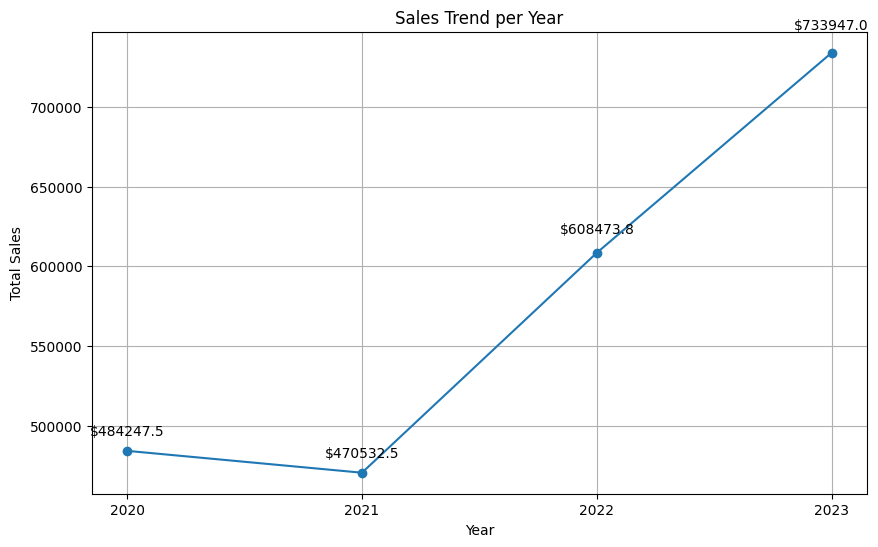

In [32]:
# Make Sales trend per year

# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Group by year and sum the Sales
Sales_per_year = df.groupby('Year')['Sales'].sum().reset_index()

# Plotting the Sales trend per year
plt.figure(figsize=(10, 6))
plt.plot(Sales_per_year['Year'], Sales_per_year['Sales'], marker='o')

# Set x-ticks as integer values for the years
plt.xticks(Sales_per_year['Year'])

# Annotate total Sales for each year
for i in range(len(Sales_per_year)):
    year = Sales_per_year['Year'][i]
    Sales = Sales_per_year['Sales'][i]
    plt.annotate(f'${Sales:.1f}', 
                 xy=(year, Sales), 
                 xytext=(year, Sales + Sales * 0.02),
                 ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Sales Trend per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Show the plot
plt.show()


The overall sales trend over the years shows a positive trajectory, despite a downturn in 2021. 
- The decline in sales during 2021 could be attributed to the economic challenges posed by the COVID-19 pandemic. 
- In 2020 and 2021, due to COVID-19 pandemic, the global economy faced a severe contraction, with the World Bank reporting a 3.5% decline in global GDP in 2020. This economic downturn led to widespread reductions in consumer spending and business investments, as many industries faced operational disruptions and financial uncertainty. The decrease in buying power likely had a significant impact on the company's earnings during this period.

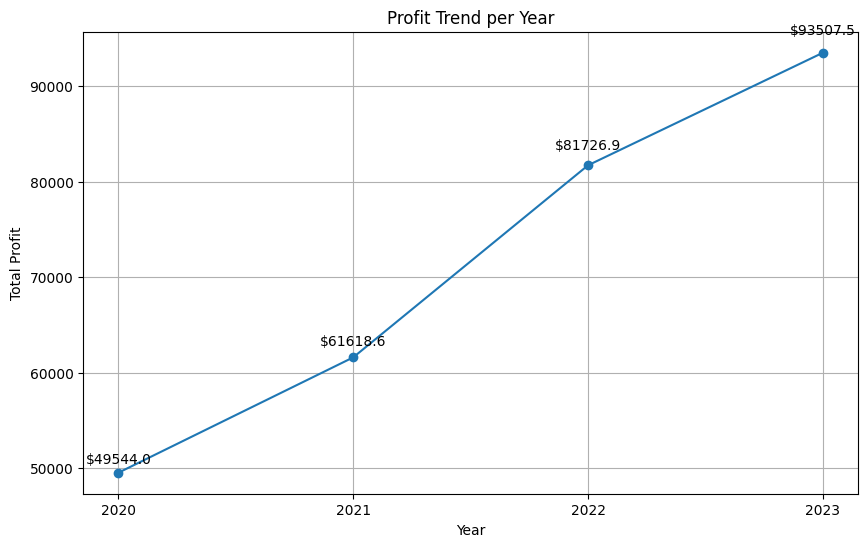

In [33]:
# Make Profit trend per year

# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Group by year and sum the profit
profit_per_year = df.groupby('Year')['Profit'].sum().reset_index()

# Plotting the profit trend per year
plt.figure(figsize=(10, 6))
plt.plot(profit_per_year['Year'], profit_per_year['Profit'], marker='o')

# Set x-ticks as integer values for the years
plt.xticks(profit_per_year['Year'])

# Annotate total profit for each year
for i in range(len(profit_per_year)):
    year = profit_per_year['Year'][i]
    profit = profit_per_year['Profit'][i]
    plt.annotate(f'${profit:.1f}', 
                 xy=(year, profit), 
                 xytext=(year, profit + profit * 0.02),
                 ha='center', fontsize=10, color='black')

# Add titles and labels
plt.title('Profit Trend per Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.grid(True)

# Show the plot
plt.show()


Although sales declined in 2021, the profit trend from 2020 to 2023 shows a consistent upward trajectory. It is essential to investigate why the company’s sales are declining while profits are increasing. To gain a clearer understanding, we need to examine the profit-to-sales ratio and analyze it further.

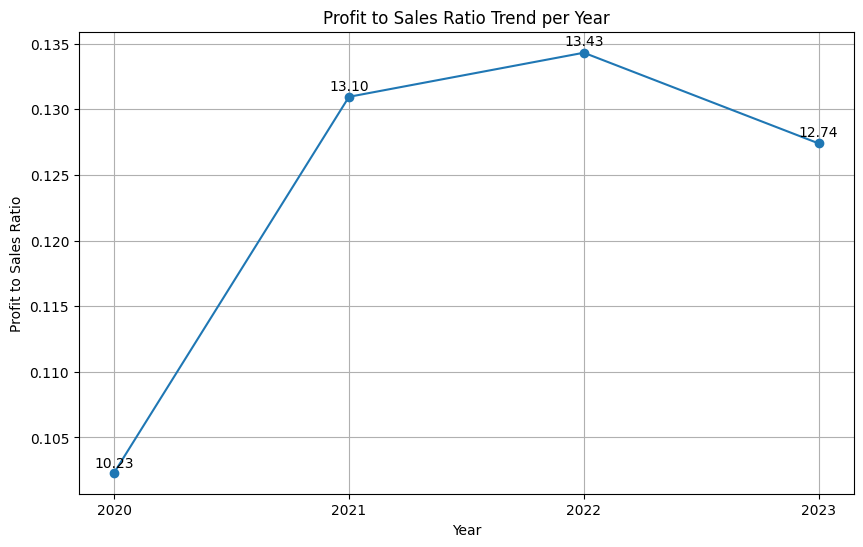

In [34]:
# Make Profit to Sales Ratio Trend per Year

# Group by year and sum the Sales and Profit
sales_per_year = df.groupby('Year')['Sales'].sum().reset_index()
profit_per_year = df.groupby('Year')['Profit'].sum().reset_index()

# Merge the Sales and Profit dataframes
sales_profit_per_year = pd.merge(sales_per_year, profit_per_year, on='Year', suffixes=('_Sales', '_Profit'))

# Calculate the Profit to Sales Ratio
sales_profit_per_year['Profit to Sales Ratio'] = sales_profit_per_year['Profit'] / sales_profit_per_year['Sales']

# Display the dataframe
sales_profit_per_year

# Plotting the Profit to Sales Ratio trend per year
plt.figure(figsize=(10, 6))
plt.plot(sales_profit_per_year['Year'], sales_profit_per_year['Profit to Sales Ratio'], marker='o')

# Set x-ticks as integer values for the years
plt.xticks(sales_profit_per_year['Year'])

# Annotate total profit for each year

for i in range(len(sales_profit_per_year)):
    year = sales_profit_per_year['Year'][i]
    profit_to_sales_ratio = sales_profit_per_year['Profit to Sales Ratio'][i]
    plt.annotate(f'{profit_to_sales_ratio * 100:.2f}', 
                 xy=(year, profit_to_sales_ratio), 
                 xytext=(year, profit_to_sales_ratio + profit_to_sales_ratio * 0.004),
                 ha='center', fontsize=10, color='black')
    
# Add titles and labels
plt.title('Profit to Sales Ratio Trend per Year')
plt.xlabel('Year')
plt.ylabel('Profit to Sales Ratio')
plt.grid(True)

# Show the plot
plt.show()

Despite the decline in sales in 2021, the profit-to-sales ratio improved compared to 2020. This increase in the profit ratio can be attributed to enhanced operational efficiency and cost management strategies. According to industry reports, companies that focused on streamlining operations and reducing overhead costs during the pandemic were able to maintain or even increase their profitability. It is important to investigate the specific strategies our company implemented to boost efficiency and analyze their impact on the profit-to-sales ratio

#### **In Depth Analysis**

**Top Sales by Product**

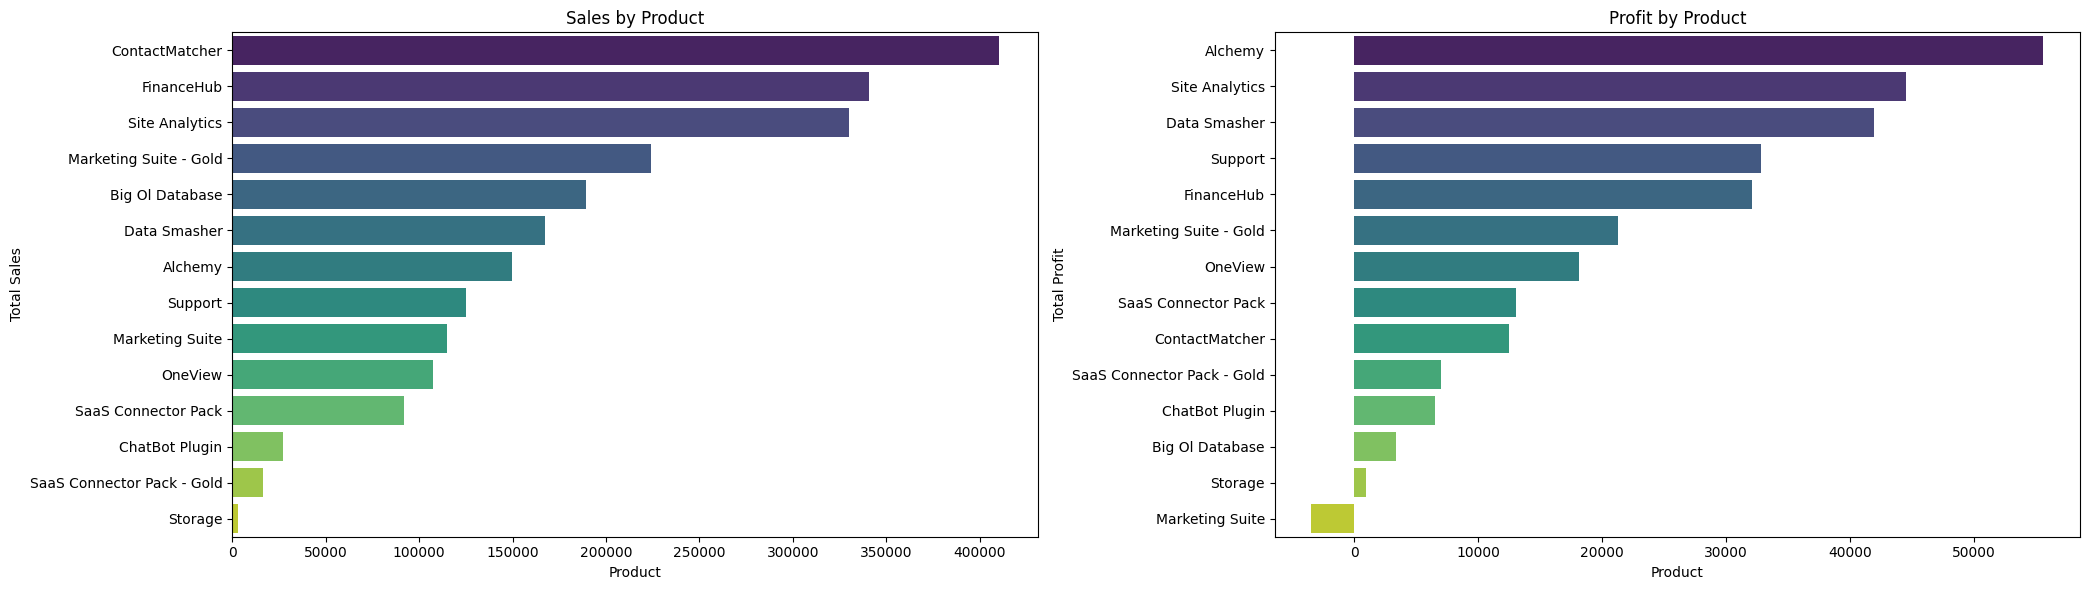

In [35]:
# Make a bar plot for sales by customer segment and profit by customer segment

sales_by_product = df.groupby('Product')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
profit_by_product = df.groupby('Product')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Set up the plotting style and size
plt.figure(figsize=(21, 6))

# Plotting the Sales by Customer Segment
plt.subplot(1, 2, 1)
sns.barplot(data = sales_by_product, x='Sales', y='Product', palette='viridis')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')

# Plotting the Profit by Customer Segment
plt.subplot(1, 2, 2)
sns.barplot(data = profit_by_product, x='Profit', y='Product', palette='viridis')
plt.title('Profit by Product')
plt.xlabel('Product')
plt.ylabel('Total Profit')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Sales Overview by Product Category**<br><br>
**Contact Matcher** is the product with the highest sales, likely due to its essential role in optimizing customer relationship management, which is critical for businesses seeking to enhance their sales and marketing efforts. As companies increasingly prioritize personalized communication and lead management.

On the other hand, **Storage** has the lowest sales among our products. This could be due to the highly competitive market for storage solutions, where numerous providers offer similar services at varying price points. Additionally, businesses may have shifted towards cloud-based storage solutions, which often come bundled with other services, reducing the standalone demand for traditional storage products.

**Profit Overview by Product Category**<br><br>
**Alchemy** is the most profitable product, likely due to its unique value proposition and strong market demand. As a premium product, Alchemy may serve to a niche segment willing to pay a higher price for advanced features, resulting in higher profit margins. Additionally, its efficiency in solving complex problems for businesses could contribute to repeat purchases and long-term customer retention, further boosting profitability.

Conversely, **Marketing Suite** is experiencing negative profit (loss), which might be due to high development and marketing costs that have not been offset by sales revenue. This could also indicate intense competition in the marketing tools sector, where price wars and customer acquisition costs are high, making it difficult to achieve profitability.

**Storage** might have a small profit due to its low sales volume. While it is not a high-demand product, the small profits it generates could be a result of low overhead costs or a small but loyal customer base. However, the limited sales significantly affect its overall profitability.

### **3.3.2 - Analyze customer segments based on their purchase patterns and map the distribution of customers.**

This segment will discuss about:
- Sales Contribution: Analyze how much each segment contributes to overall sales and profit.
- Product Preferences: Identify which products are most popular within each segment.
- Demographic Analysis: Compare customer segments by demographics such as region, country, or industry.

In [36]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021


**Customer Segment Proportion**

In [37]:
df['Segment'].value_counts()

Segment
SMB           5191
Strategic     3020
Enterprise    1783
Name: count, dtype: int64

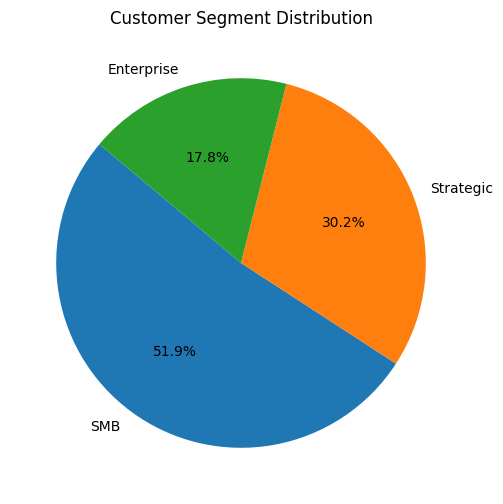

In [38]:
# Make pie chart for customer segment distribution

# Count the number of customers in each segment
segment_counts = df['Segment'].value_counts()

# Plotting the customer segment in pie chart
plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)

# Add titles and labels
plt.title('Customer Segment Distribution')

# Show the plot
plt.show()

**Majority of customers is from SMB** (Small and Medium-sized Businesses). Most of our customers are from SMBs. This might be because our products are well-suited to their needs and budget. SMBs often look for cost-effective solutions that are easy to implement, making our offerings attractive to them. Additionally, SMBs usually have a higher number of potential customers compared to larger enterprises, which could explain the larger proportion.

**Enterprise Segment** has the lowest proportion, The enterprise segment makes up the smallest proportion of our customers. This could be due to longer sales cycles, higher customization requirements, or more complex decision-making processes in large organizations. Enterprises might also have existing partnerships with other providers or use in-house solutions, making it harder for us to penetrate this market.

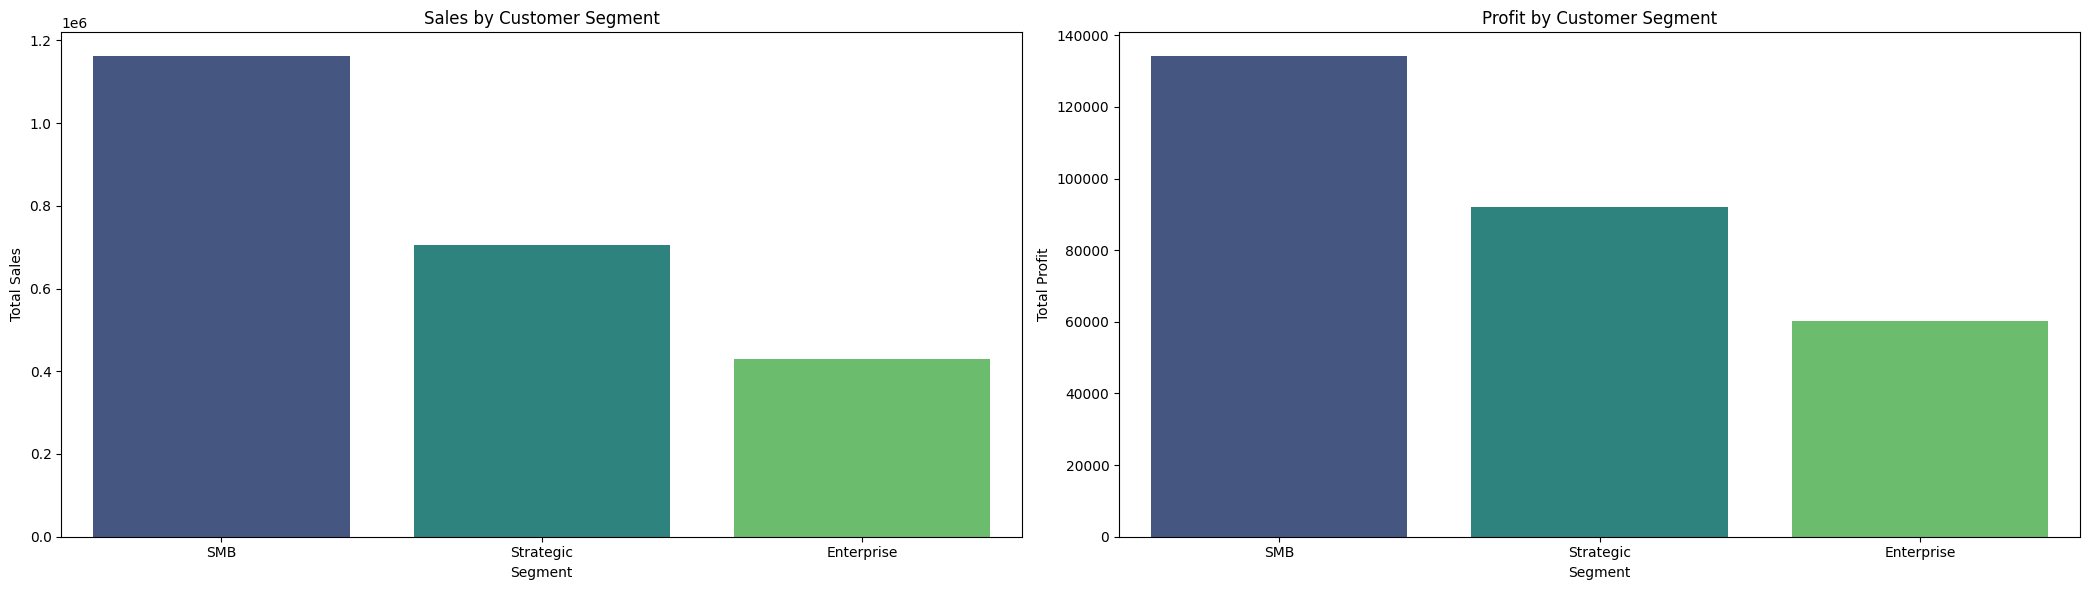

In [39]:
# Show total sales and profit by customer segment

# Group by Segment and sum the Sales and Profit
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Set up the plotting style and size
plt.figure(figsize=(21, 6))

# Plotting the Sales by Customer Segment
plt.subplot(1, 2, 1)
sns.barplot(data = sales_by_segment, x='Segment', y='Sales', palette='viridis')
plt.title('Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')

# Plotting the Profit by Customer Segment
plt.subplot(1, 2, 2)
sns.barplot(data = profit_by_segment, x='Segment', y='Profit', palette='viridis')
plt.title('Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

- SMBs contribute the most to sales and profit, followed by Strategic and Enterprise segments. The sales and profit distribution across segments align with the customer proportion, indicating that the SMB segment drives the majority of revenue.

**Customer Industry Proportion**

In [40]:
df['Industry'].value_counts()

Industry
Finance              2127
Energy               1316
Tech                 1236
Manufacturing        1222
Healthcare           1049
Consumer Products    1021
Retail                972
Communications        593
Transportation        351
Misc                  107
Name: count, dtype: int64

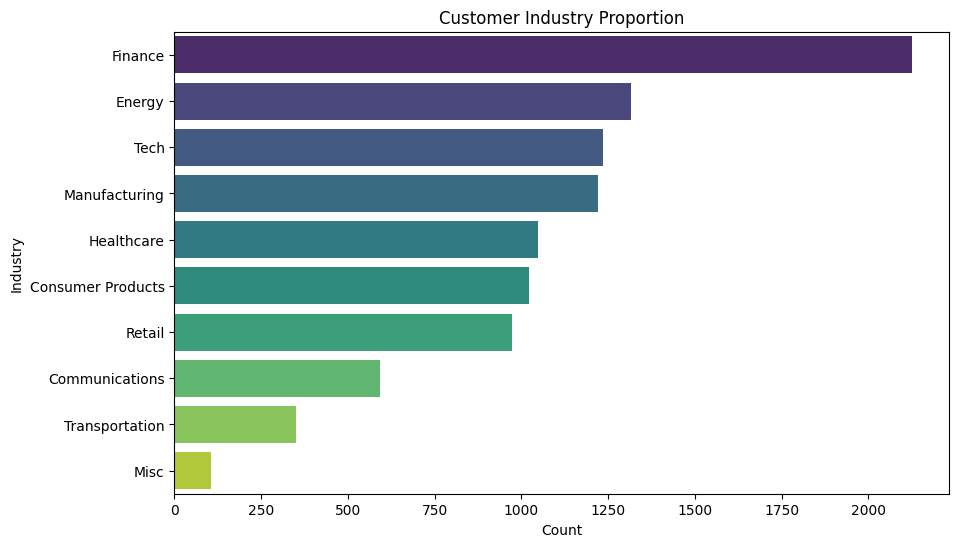

In [41]:
# Show customer industry proportion with barplot

# Count the number of customers in each industry
industry_counts = df['Industry'].value_counts()

# Plotting the customer industry in bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')

# Add titles and labels
plt.title('Customer Industry Proportion')
plt.xlabel('Count')
plt.ylabel('Industry')

# Show the plot
plt.show()

- The finance industry has the most transactions. The finance industry leads in the number of transactions with our company.

- We need to analyze which products the finance sector is purchasing most to make more targeted decisions.

- Strong presence in energy, tech, and manufacturing. The energy, tech, and manufacturing sectors also have a significant share of transactions, likely because SaaS products are highly relevant to their needs.

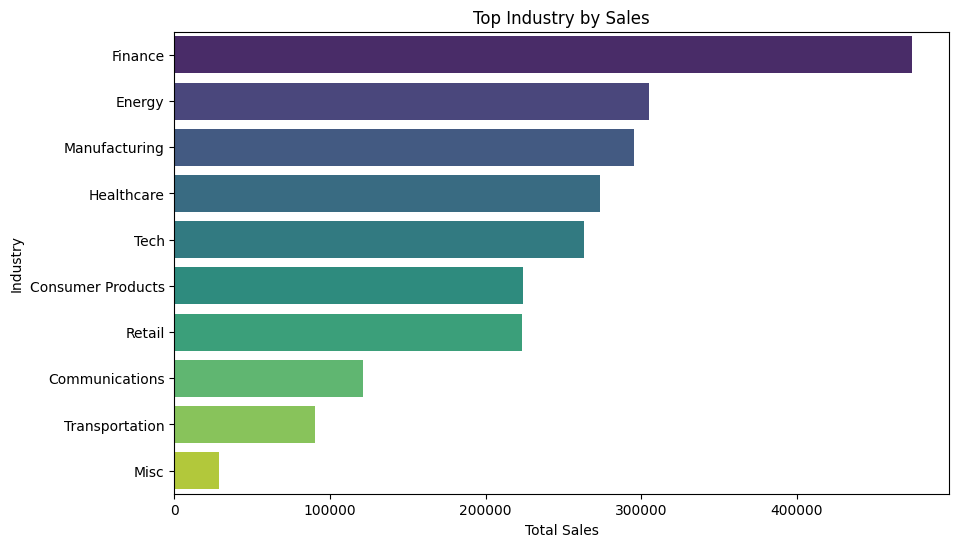

In [42]:
# Find industries that have most sales

# Group by Industry and sum the Sales
top_sales_industry = df.groupby('Industry')['Sales'].sum().reset_index()

# Sort the industries by Sales in descending order
top_sales_industry = top_sales_industry.sort_values(by='Sales', ascending=False)

# Plotting the Industry by Sales descending order
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Industry', data=top_sales_industry, palette='viridis')

# Add titles and labels
plt.title('Top Industry by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Industry')

# Show the plot
plt.show()

- Finance industry has the highest sales. It indicates that the finance industry is a key revenue driver for our company. This could be due to the high demand for financial software solutions in the industry, as well as the potential for larger deal sizes and recurring revenue streams from finance clients.

- Energy and manufacturing following the finance industry in sales. The energy and manufacturing sectors also contribute significantly to our sales revenue. This could be due to the need for specialized software solutions in these industries to manage operations, optimize processes, and ensure compliance with industry standards.

- Even though the tech industry has a high number of transactions, it does not have the highest sales. This could be due to the competitive nature of the tech industry, where companies have multiple options for software solutions and may prioritize cost-effectiveness over premium offerings.

- Transportation industry has the lowest sales. The transportation industry has the lowest sales among the top industries. This could be due to the lower demand for software solutions in the transportation sector.

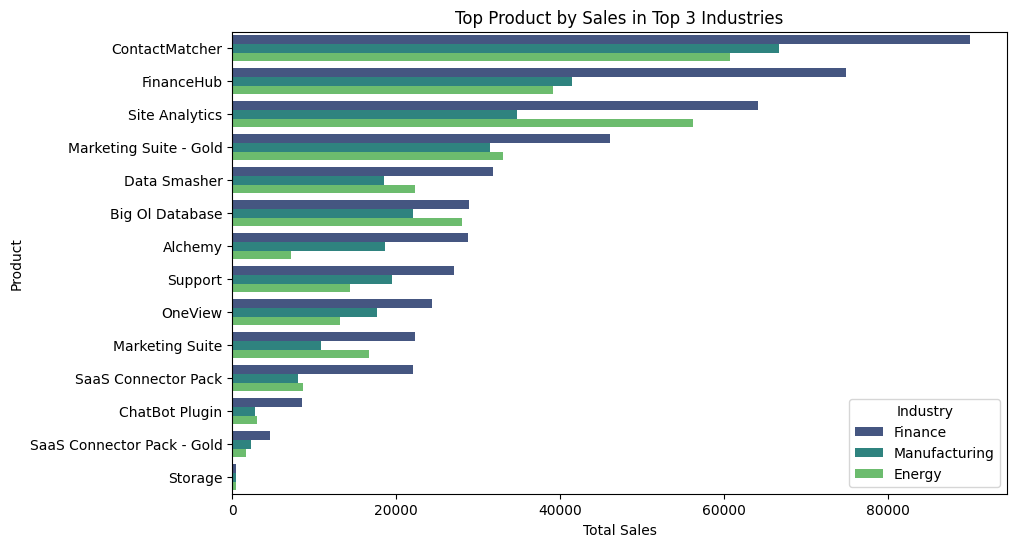

In [43]:
# Find most product sold in top 3 industries sales

# Get the top 3 industries by Sales
top_3_industries = top_sales_industry.head(3)

# Filter the data for the top 3 industries
top_3_industries_data = df[df['Industry'].isin(top_3_industries['Industry'])]

# Group by Product and sum the Sales
top_product_industry = top_3_industries_data.groupby(['Product', 'Industry'])['Sales'].sum().reset_index()

# Sort the products by Sales in descending order
top_product_industry = top_product_industry.sort_values(by='Sales', ascending=False)

# Plotting the Product by Sales descending order with hue for industries
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Product', hue='Industry', data=top_product_industry, palette='viridis')

# Add titles and labels
plt.title('Top Product by Sales in Top 3 Industries')
plt.xlabel('Total Sales')
plt.ylabel('Product')

# Show the plot
plt.show()

- ContactMatcher, FinanceHub and Site Analytic are the top products for the top 3 industries. These 3 product also have the highest sales in overall sales. 

- Site Analytics sales in manufacturing industry is outperformed by energy industry. This could be a potential area for improvement in the manufacturing sector.

**Compare customer segments by demographics such as region, country**

In [44]:
df.head()

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
2,AMER-2022-138688,2022-06-13,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021


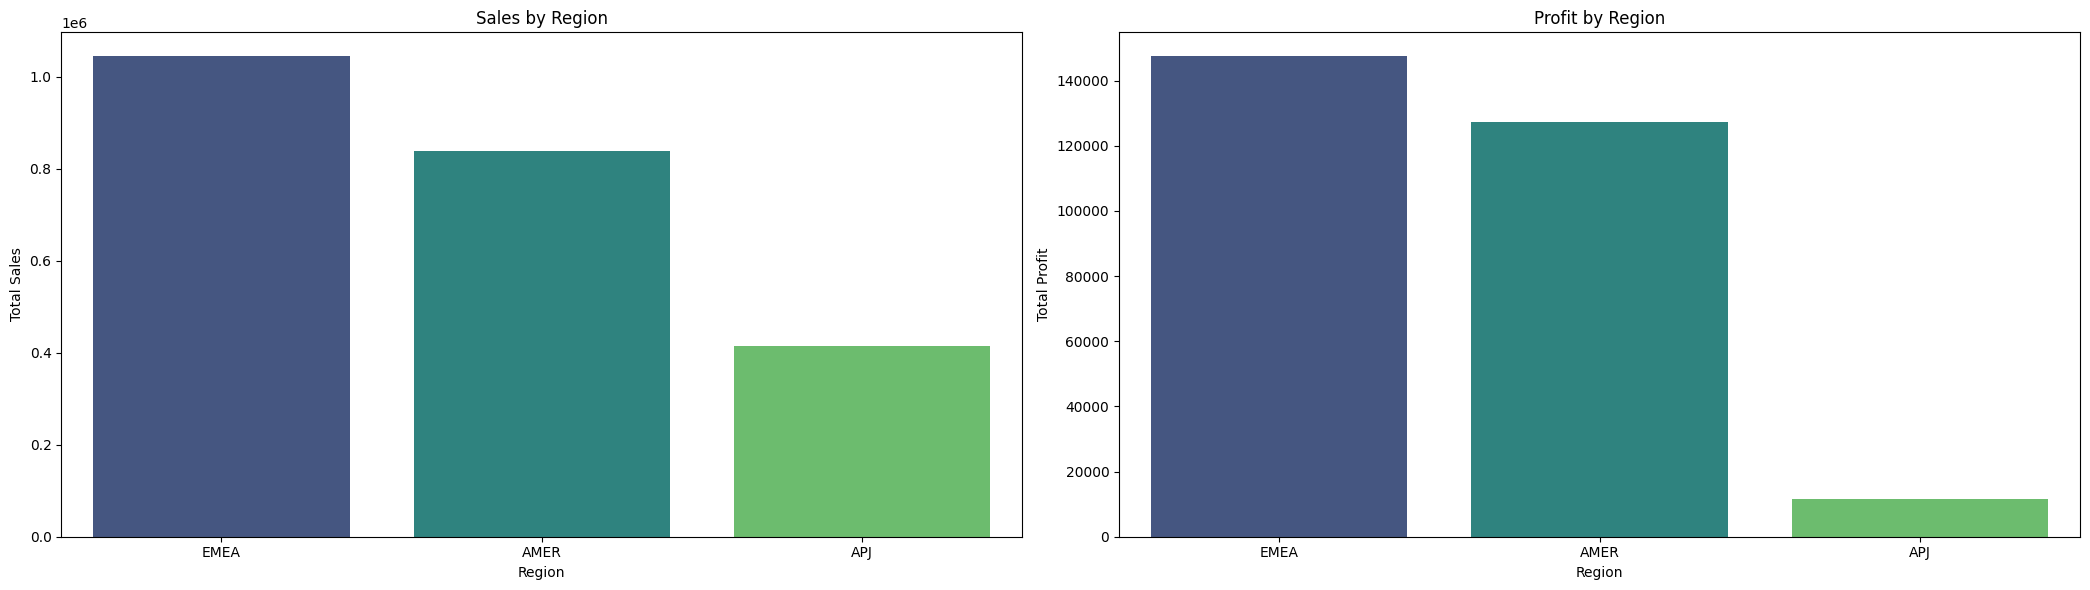

In [45]:
# Create a figure with two subplots
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(21, 6))

# Group by Region and sum the Sales
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

# Sort the regions by Sales in descending order
sales_by_region = sales_by_region.sort_values(by='Sales', ascending=False)

# Plotting the Region by Sales descending order
sns.barplot(data=sales_by_region, x='Region', y='Sales', palette='viridis', ax=ax0)

# Add titles and labels for sales plot
ax0.set_title('Sales by Region')
ax0.set_xlabel('Region')
ax0.set_ylabel('Total Sales')

# Group by Region and sum the Profit
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)

# Plotting the Region by Profit descending order
sns.barplot(data=profit_by_region, x='Region', y='Profit', palette='viridis', ax=ax1)

# Add titles and labels for profit plot
ax1.set_title('Profit by Region')
ax1.set_xlabel('Region')
ax1.set_ylabel('Total Profit')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

- Distribution of sales and profit in every region is relatively balanced. But, as we can see, APJ region has very low profit compared to their sales and when compared to other region. We need to pay more attention to this region, so we can take a good decision.

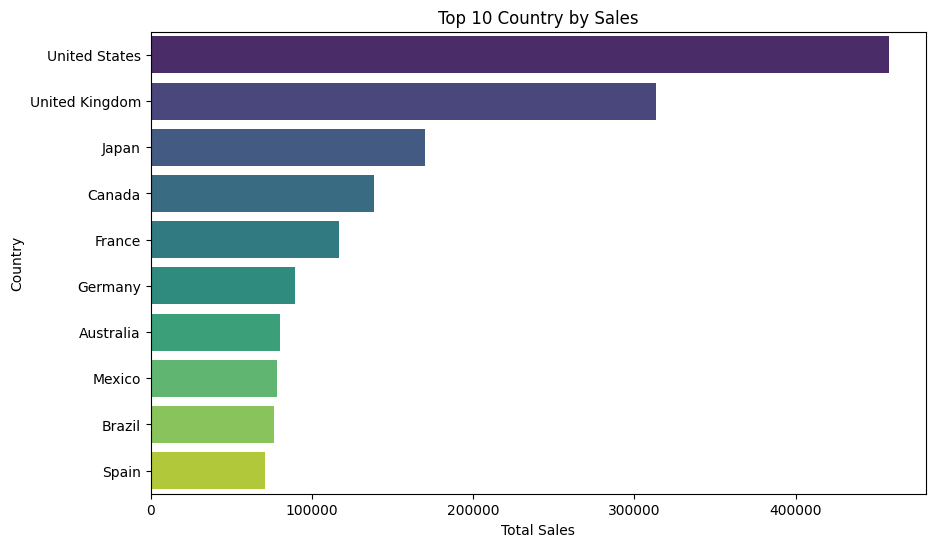

In [46]:
# Show top 10 Country by sales

# Group by Country and sum the Sales
top_sales_country = df.groupby('Country')['Sales'].sum().reset_index()

# Sort the countries by Sales in descending order
top_sales_country = top_sales_country.sort_values(by='Sales', ascending=False).head(10)

# Plotting the Country by Sales descending order
plt.figure(figsize=(10, 6))
sns.barplot( data=top_sales_country, x='Sales', y='Country',palette='viridis')

# Add titles and labels
plt.title('Top 10 Country by Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')

# Show the plot
plt.show()

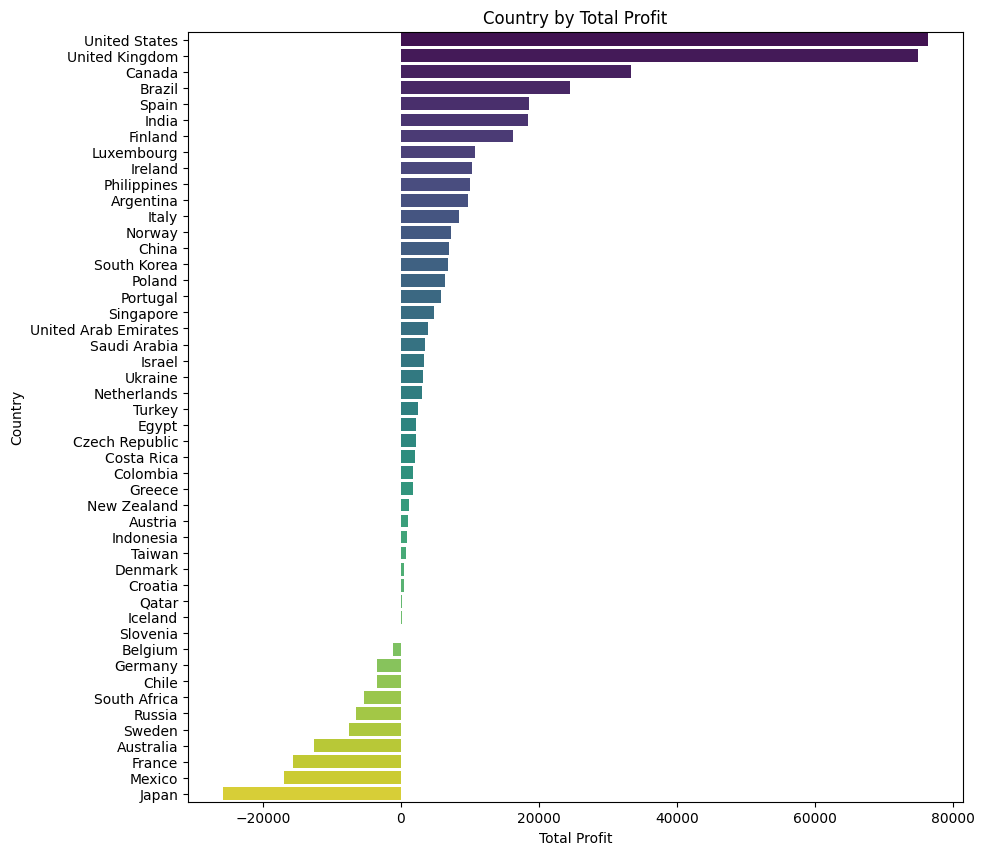

In [47]:
# show top 10 country with most profit and show it in bar plot

# Group by Country and sum the Profit
top_profit_country = df.groupby('Country')['Profit'].sum().reset_index()

# Sort the countries by Profit in descending order
top_profit_country = top_profit_country.sort_values(by='Profit', ascending=False)

# Plotting the Country by Profit descending order
plt.figure(figsize=(10, 10))
sns.barplot(data=top_profit_country, x='Profit', y='Country',palette='viridis')

# Add titles and labels
plt.title('Country by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

# Show the plot
plt.show()


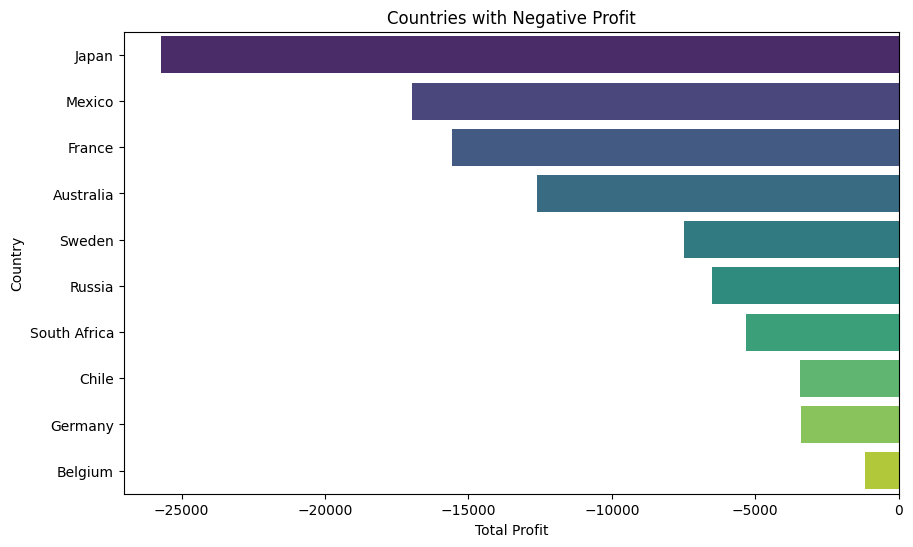

In [48]:
# Group by Country and sum the Profit
top_loss_country = df.groupby('Country')['Profit'].sum().reset_index()

# Sort the countries by Profit in order
top_loss_country = top_loss_country[top_loss_country['Profit'] < 0].sort_values(by='Profit', ascending=True)

# Plotting the Country by Profit descending order
plt.figure(figsize=(10, 6))
sns.barplot(data=top_loss_country, x='Profit', y='Country',palette='viridis')

# Add titles and labels
plt.title('Countries with Negative Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

# Show the plot
plt.show()


- The United States has the highest number of sales and profit followed by United Kingdom. This indicates that the US and UK markets are the main revenue drivers.

- There's a very unique pattern in the sales and profit distribution. Japan is rank 3 in sales, but Japan is the country with the largest corporate losses (-$25.729). High sales in Japan does not imply high profits. This could be due to high operational costs, policy restrictions or other non technical factors.

- Beside Japan, there are several countries with negative profit. This should be investigated further to understand the causes and potential solutions.

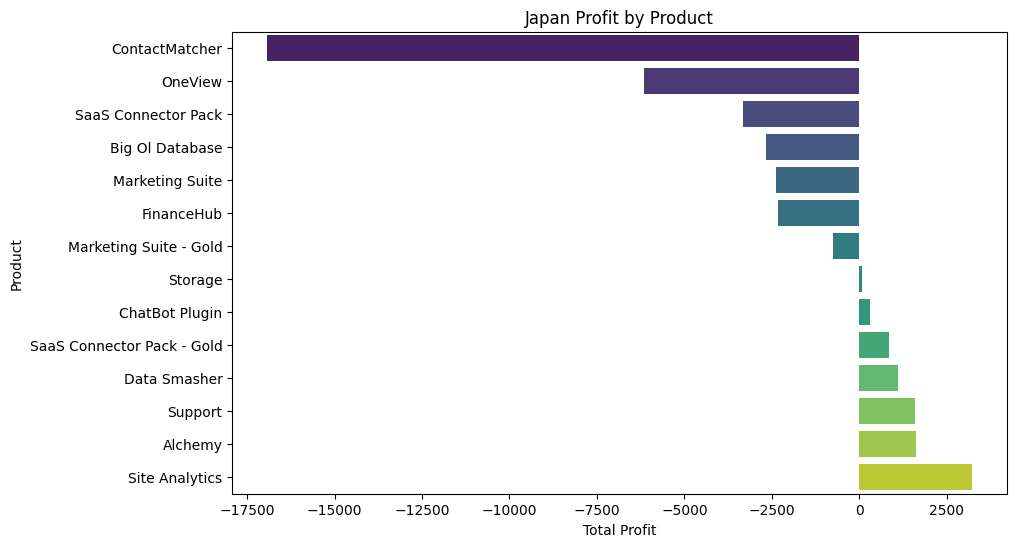

In [49]:
# Show what product that occur the biggest loss in Japan

# Filter the data for Japan
japan_data = df[df['Country'] == 'Japan']

# Group by Product and sum the Profit
japan_profit = japan_data.groupby('Product')['Profit'].sum().reset_index()

# Sort the products by Profit in descending order
japan_profit = japan_profit.sort_values(by='Profit', ascending=True)

# Plotting the Product by Profit descending order
plt.figure(figsize=(10, 6))
sns.barplot(data=japan_profit, x='Profit', y='Product', palette='viridis')

# Add titles and labels
plt.title('Japan Profit by Product')
plt.xlabel('Total Profit')
plt.ylabel('Product')

# Show the plot
plt.show()

- After analyzing about the sales and profit distribution in Japan, we can see that 7 out of 14 products have negative profit. The biggest loss comes from ContactMatcher, which has a loss around $17.000 in Japan. Evaluate the pricing strategy, operational costs, and market demand in Japan to improve profit and sales performance.

***In addition we can also check who are the customer that made the most loss in Japan.***

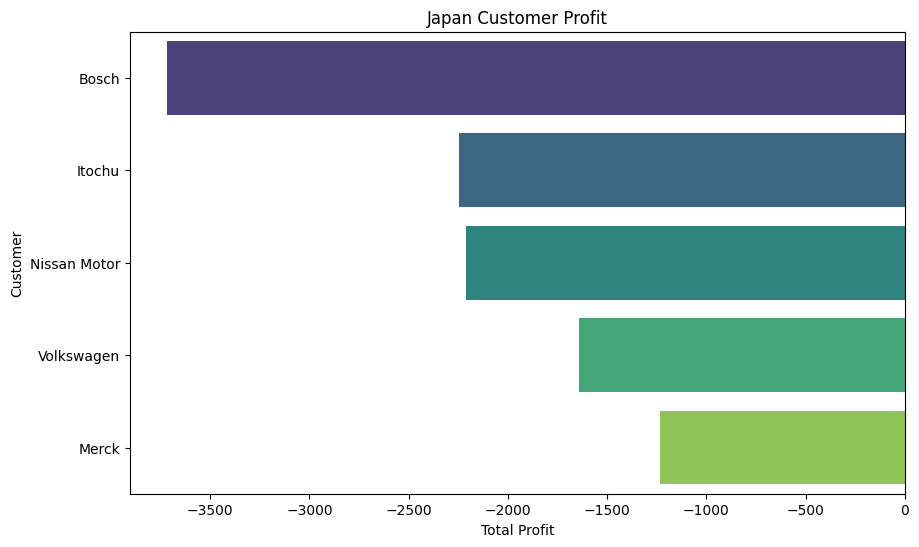

In [50]:
# Show the customer name with negative profit in japan

# Select all data from japan
japan_data = df[df['Country'] == 'Japan']

# Group by Product and sum the profit
japan_profit = japan_data.groupby('Customer')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=True)

japan_profit = japan_profit[japan_profit['Profit'] < 0].head(5)

# show the customer with negative profit in japan
plt.figure(figsize=(10, 6))
sns.barplot(data=japan_profit, x='Profit', y='Customer', palette='viridis')

# Add titles and labels
plt.title('Japan Customer Profit')
plt.xlabel('Total Profit')
plt.ylabel('Customer')

# Show the plot
plt.show()

- From these information, we can see customer that made the most loss in Japan. This information can be used to evaluate the customer relationship, product fit, and pricing strategy for these customers.

**Customer Geographical Distribution**

In [51]:
# Get latitude and longtitude because we don't have it in the data

# get latitude and longitude for each country with geopy
from geopy.geocoders import Nominatim


# make country grouped by sales
country_sales = df.groupby('Country')[['Sales', 'Profit']].sum().reset_index()

# add latitude and longitude to the country_sales dataframe
country_sales['Latitude'] = 0
country_sales['Longitude'] = 0

# get the country name
country_name = country_sales['Country'].unique()

# get the latitude and longitude for each country
geolocator = Nominatim(user_agent="name_of_your_app")

for i, country in enumerate(country_name):
    location = geolocator.geocode(country)
    country_sales.loc[country_sales['Country'] == country, 'Latitude'] = location.latitude
    country_sales.loc[country_sales['Country'] == country, 'Longitude'] = location.longitude

country_sales = country_sales.sort_values(by='Sales', ascending=False)
country_profit = country_sales.sort_values(by='Profit', ascending=False)


In [52]:
# Create map to show country with biggest sales and lowest sales
import folium

# Create a map centered at [0, 0] with zoom level 2
sales_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for 5 top sales with blue
for i in range(5):
    folium.Marker(
        location=[country_sales['Latitude'].iloc[i], country_sales['Longitude'].iloc[i]],
        popup=f"{country_sales['Country'].iloc[i]}: ${country_sales['Sales'].iloc[i]:,.0f}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(sales_map)

# Add markers for 5 lowest sales with red
for i in range(-5, 0):
    folium.Marker(
        location=[country_sales['Latitude'].iloc[i], country_sales['Longitude'].iloc[i]],
        popup=f"{country_sales['Country'].iloc[i]}: ${country_sales['Sales'].iloc[i]:,.0f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(sales_map)

# Display the map
sales_map

In [53]:
# Create map for profit in each country

# Create a map centered at [0, 0] with zoom level 2
profit_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for 5 top profit with blue
for i in range(5):
    folium.Marker(
        location=[country_profit['Latitude'].iloc[i], country_profit['Longitude'].iloc[i]],
        popup=f"{country_profit['Country'].iloc[i]}: ${country_profit['Profit'].iloc[i]:,.0f}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(profit_map)

# Add markers for 5 lowest profit (loss) with red
for i in range(-5, 0):
    folium.Marker(
        location=[country_profit['Latitude'].iloc[i], country_profit['Longitude'].iloc[i]],
        popup=f"{country_profit['Country'].iloc[i]}: ${country_profit['Profit'].iloc[i]:,.0f}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(profit_map)

# Display the map
profit_map

- Following map shows the geographical distribution of country with the highest and lowest value in sales and profit.
- There are no spesific pattern in the geographical distribution that show any correlation with sales and profit.
- We can use the geographical distribution information to specify the location of the trend.

### **3.3.3 - Identify key factors that can boost sales and profit.**

In the business introduction section, we already know about the SaaS sales characteristic. In this section, we will analyze the key factors that can boost sales and profit.
Here are some key factors which is a derivative from the SaaS business characteristic:
- SaaS businesses generate revenue through subscriptions. As it generating revenue through subscriptions, total customer and customer retention is the key factor to boost company revenue.
- New customer may interested to subscribe to our service through any offers such as discounted price. We also need to analyze how discount affect the sales and profit.

#### **Total Customer Growth per Year**

In [54]:
customer_count_per_year = df.groupby('Year')['Customer'].nunique().reset_index()
customer_count_per_year

,Year,Customer
0,2020,99
1,2021,99
2,2022,99
3,2023,99


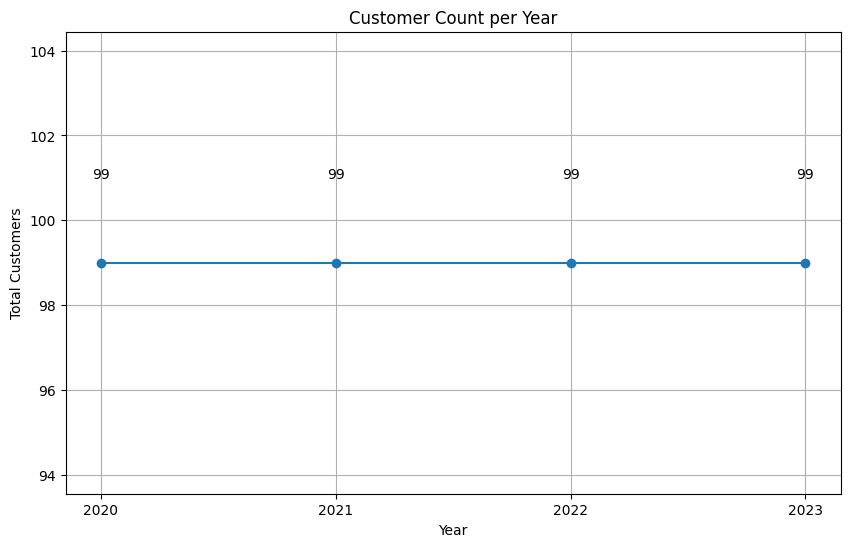

In [55]:
# Count every distinct customer every year and show it in line plot

# Extract the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Group by year and count the distinct customers
customer_count_per_year = df.groupby('Year')['Customer'].nunique().reset_index()

# Plotting the Customer Count per Year
plt.figure(figsize=(10, 6))
plt.plot(customer_count_per_year['Year'], customer_count_per_year['Customer'], marker='o')

# Set x-ticks as integer values for the years
plt.xticks(customer_count_per_year['Year'])

# Annotate total customers for each year
for i in range(len(customer_count_per_year)):
    year = customer_count_per_year['Year'][i]
    customer_count = customer_count_per_year['Customer'][i]
    plt.annotate(f'{customer_count}', 
                 xy=(year, customer_count), 
                 xytext=(year, customer_count + customer_count * 0.02),
                 ha='center', fontsize=10, color='black')
    
# Add titles and labels
plt.title('Customer Count per Year')
plt.xlabel('Year')
plt.ylabel('Total Customers')
plt.grid(True)

# Show the plot
plt.show()

After analyzing the total customer per year. We find that for 4 years (2020 - 2023), total of customer per year is the same. This might happened because the limitation of the data.
Additionally, we can assume that our company is making a good trend to retain the customer, as we can see the total customer at least is not decreasing.

In [56]:
# Check wether the customer in 2020 is still the same in 2021, 2022 and 2023

# Get the list of customers in 2020
customers_2020 = df[df['Year'] == 2020]['Customer'].unique()

# Get the list of customers in 2021, 2022, and 2023
customers_2021 = df[df['Year'] == 2021]['Customer'].unique()
customers_2022 = df[df['Year'] == 2022]['Customer'].unique()
customers_2023 = df[df['Year'] == 2023]['Customer'].unique()

# Check if the customers in 2020 are still the same in 2021, 2022, and 2023
customers_2020_2021 = set(customers_2020).intersection(customers_2021)
customers_2020_2022 = set(customers_2020).intersection(customers_2022)
customers_2020_2023 = set(customers_2020).intersection(customers_2023)

# Display the results
print(f"Customers in 2020 that are still the same in 2021: {len(customers_2020_2021)}")
print(f"Customers in 2020 that are still the same in 2022: {len(customers_2020_2022)}")
print(f"Customers in 2020 that are still the same in 2023: {len(customers_2020_2023)}")

Customers in 2020 that are still the same in 2021: 99
Customers in 2020 that are still the same in 2022: 99
Customers in 2020 that are still the same in 2023: 99


From above information, we can see that the customer that listed in our data in 2023 is the same as 2020. But again, this might happened because of the data limitation.
But at least, we can assume that we don't lose any customer from 2020 to 2023.

#### **Effect of Discount as an Offer to Customer**

After we analyze about the old customer retention, we also need to check if the discount offer is effective to attract new customer.

In [57]:
# Check the correlation of discount with sales and profit

df[['Discount', 'Profit', 'Sales']].corr('spearman')


,Discount,Profit,Sales
Discount,1.000000,-0.543350,-0.056969
Profit,-0.543350,1.000000,0.518407
Sales,-0.056969,0.518407,1.000000


From correlation analysis, there's a interesting insight.
- The correlation of profit and discount is (-0.54), indicating that discount has a negative impact on profit. This is pretty normal since discount will reduce the profit by overall.
- Some intersting fact from the correlation score, is the correlation between discount and sales is also negative (-0.05). This is interesting since from the correlation score, we can assume that discount is not really effective to boost the sales.
- We can assume that our customer is not really looking for the discount since our customer is a big company that prefer a quality than a discount.

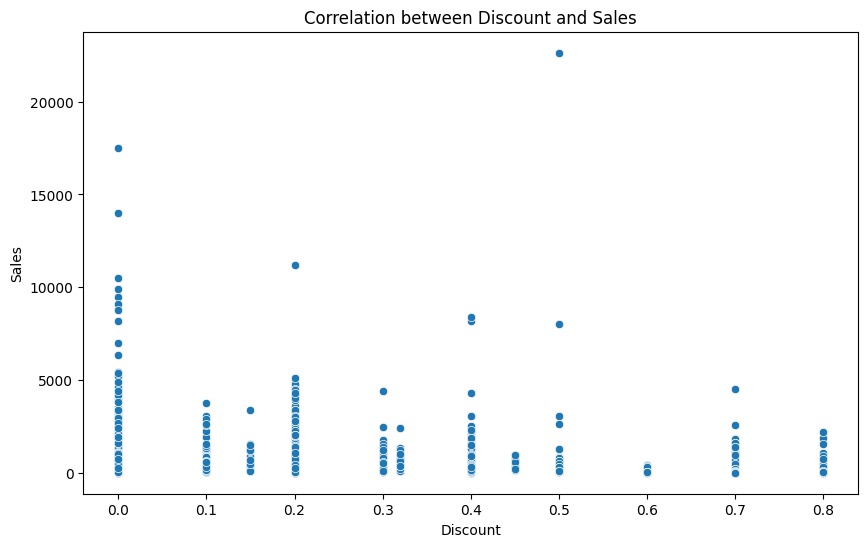

In [58]:
# Create a scatterplot to show the correlation between Discount and Sales
plt.figure(figsize=(10, 6))

# Plotting the correlation between Discount and Sales
sns.scatterplot(data=df, x='Discount', y='Sales', palette='viridis')

# Add titles and labels
plt.title('Correlation between Discount and Sales')
plt.xlabel('Discount')
plt.ylabel('Sales')

# Show the plot
plt.show()

From the scatterplot above, we can see sales value of each discount value.
- Scatterplot shows that with 0 discount, we still can get a high sales value. This is a good sign that our customer is not really looking for the discount.
- But there's a interesting insight that the biggest sales that happened is when the discount is 0.5. So we can also assume that maybe discount actually still relevant to boost the sales even the effect is not really significant.
- This insight is both reject and accept our analysis earlier. Even though our customer majority is from SMB that may be a little strict about the budget, but also accept the stamement that gaining the customer trust is important, so the customer still willing to pay the full price.

In [59]:
### Save DataFrame ###

df.to_csv('SaaS-Sales-Cleaned.csv')

# **4. Conclusion and Recommendation** 

---

## **4.1 Conclusion**

#### **Sales and Profit Performance**
- Sales Trend: Sales have generally increased over the years, but there was a decline in 2021. This downturn coincided with the global economic challenges during the 2020-2021 period when the world was facing the COVID-19 pandemic, which led to reduced consumer spending and business investments.

- Profit Trend: Despite the drop in sales in 2021, profits have consistently increased from 2020 to 2023. This suggests that while sales decreased, the company became more efficient, improving its profit margins.

- Profit-to-Sales Ratio: The ratio of profit to sales improved in 2021, likely due to better operational efficiency and cost management. To understand this further, we should examine the specific strategies that contributed to these improvements.

 #### **Customer Segments and Behavior**
- SMBs Dominate: Most of our customers are small and medium-sized businesses (SMBs). Our products likely suit to them due to their cost-effectiveness and ease of implementation.

- Enterprise Segment Smallest: The enterprise segment is the smallest, possibly due to longer sales cycles, complex needs, and existing partnerships with other providers.

- Sales & Profit Driven by SMBs: SMBs contribute the most to our sales and profits, followed by the Strategic and Enterprise segments.

- Finance Industry Leads: The finance industry has the most transactions and highest sales, making it a key revenue driver.

- Energy, Tech, and Manufacturing Strong: These sectors also have significant transactions and sales, showing strong relevance to our products.

- Tech Industry Anomaly: Despite high transaction numbers, the tech industry doesn’t lead in sales, likely due to competitive pricing pressures.

- Transportation Lowest: The transportation industry has the lowest sales among key sectors, possibly due to lower demand for our products.

#### **Geographical Distribution**
- Balanced Distribution: Sales and profits are relatively balanced across regions, but the APJ region has notably low profits despite decent sales.

- US and UK Lead: The US and UK are our top markets for both sales and profit.

- Japan’s Unique Pattern: Japan ranks third in sales but has the largest corporate losses. High sales don’t translate to high profits, possibly due to high costs or other factors.

- Negative Profits in Some Countries: Several countries, including Japan, show negative profits. This requires further investigation.

- Product Losses in Japan: In Japan, 7 out of 14 products have negative profits, with the biggest loss from ContactMatcher. Reviewing pricing, operational costs, and market demand is crucial for improvement.

#### **Factors to Boost Sales and Profit**

- SaaS businesses generate revenue through subscriptions. As it generating revenue through subscriptions, total customer and customer retention is the key factor to boost company revenue.

- New customer may interested to subscribe to our service through any offers such as discounted price. We also need to analyze how discount affect the sales and profit.

- Our company make a good trend to retain the customer, as we can see the total customer at least is not decreasing.

- Discount has a negative impact on profit, but the biggest sales that happened is when the discount is 0.5. So we can also assume that maybe discount actually still relevant to boost the sales even the effect is not really significant.

- This insight is both reject and accept our analysis earlier. Even though our customer majority is from SMB that may be a little strict about the budget, but also accept the stamement that gaining the customer trust is important, so the customer still willing to pay the full price.

- There might be a data limitation in the dataset. This should be taken into consideration of the analysis, and become a analysis flaw.

## **4.2 Recommendation**

1. **Focus on Customer Retention**
- `Leverage Subscriptions`: Since revenue is driven by subscriptions, prioritize strategies that enhance customer retention. This includes offering loyalty programs, personalized services, and continuous value delivery to ensure customers stay subscribed over the long term.

2. **Optimize Pricing and Discount Strategies**
- `Evaluate Discount Impact`: While discounts can attract new customers, they also negatively impact profits. Consider implementing targeted discounts, such as small, time-limited offers (e.g., 0.5% discounts), which have shown to boost sales without drastically reducing profit margins.
- `Test Full-Price Sales`: Given that SMBs, despite budget consideration, have shown willingness to pay full price, experiment with reducing discount frequency and focusing on building trust and demonstrating value to justify full-price offerings.

3. **Investigate Low-Profit Regions and Products**
- `Address APJ Region Issues`: The APJ region shows low profits despite decent sales. Investigate the specific challenges in this region, such as operational costs or market conditions, and implement targeted strategies to improve profitability.
- `Revise Japan Strategy`: With Japan showing the largest corporate losses, particularly in products like ContactMatcher, it's essential to reassess pricing, operational efficiency, and market fit in this region. Consider adjusting product offerings or exploring cost reduction measures.

4. **Tailor Offerings for Key Industries**
- `Focus on High-Potential Sectors`: Continue to strengthen relationships and tailor products for the finance, energy, tech, and manufacturing sectors, as they represent significant sales opportunities. Ensure that the product offerings meet the specific needs and challenges of 
these industries.

5. **Address Competitive Pressures in Tech**
- `Enhance Value Proposition`: In the tech industry, where competition is tough and sales are not leading despite high transaction numbers, focus on enhancing the value proposition. This might involve offering more flexible pricing models, bundling services, or providing additional features that address industry-specific challenges.

6. **Investigate and Mitigate Analysis Flaws**
- `Data Review`: Acknowledge the potential limitations in the dataset used for analysis. Consider conducting a thorough data review or incorporating additional data sources to ensure a more comprehensive understanding of the market dynamics. This will lead to more accurate and actionable insights.